## Hash Table

### Design a Hash Table

#### Leetcode 705. Design HashSet
* Overview
  + Design a HashSet without using any built-in hash table libraries.
  + Implement MyHashSet class:
    + void add(key) Inserts the value key into the HashSet.
    + bool contains(key) Returns whether the value key exists in the HashSet or not.
    + void remove(key) Removes the value key in the HashSet. If key does not exist in the HashSet, do nothing.
  + Constraints:
    + 0 <= key <= 10^6
    + At most 10^4 calls will be made to add, remove, and contains.  
* Algorithm
  + implement by array 
    + initialize a 10001 element array
    + using index as the key and its value as value (initialized to be None)
    + when remove an index, set its value to None
    + when searching a key, check if its value is None
    + Time complexity
      + O(1) for all operations
    + Space complexity  
      + O(1) 
  + implement by linked list
    + using key as node value
    + using linked list traverse to find and check if a node exists
    + using linked list delete and add operations to delete or add elements to the linked list
      + instead of using a tail pointer to add new node, only use head and insert new node from the head node. This will simplify the remove operation. Otherwise, the remove operation may remove the node pointed by the tail pointer, where will point to a removed node
  + use an array with sub-list to collect all item corresponding to the same hash code    
  + time complexity for all operations
    + O(N)
  + space complexity
    + O(N)
    

In [1]:
class MyHashSet:

    def __init__(self):
        self.arr = [None] * 1000001        

    def add(self, key: int) -> None:
        self.arr[key] = key        

    def remove(self, key: int) -> None:
        if self.arr[key] is None:
            return
        self.arr[key] = None        

    def contains(self, key: int) -> bool:
        return False if self.arr[key] is None else True
        


# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)


# linkedlist implementation by inserting to head 
class Node:
    def __init__(self, val: int):
        self.val = val
        self.next = None
        
class MyHashSet:

    def __init__(self):
        self.head = Node(-1)        

    def add(self, key: int) -> None:
        if self.contains(key):
            return
        node = Node(key)  
        node.next = self.head.next
        self.head.next = node
       

    def remove(self, key: int) -> None:        
        curr = self.head
        while curr and curr.next:
            if curr.next.val == key:
                curr.next = curr.next.next                
                return
            curr = curr.next            
        
    def contains(self, key: int) -> bool:
        curr = self.head.next
        while curr:            
            if curr.val == key:
                return True
            curr = curr.next
        return False    
        
# Linkedlist implementation by inserting to the tail using self.tail
class Node:
    def __init__(self, val: int):
        self.val = val
        self.next = None
        
class MyHashSet:

    def __init__(self):
        self.head = Node(-1) 
        self.tail = self.head

    def add(self, key: int) -> None:
        if self.contains(key):
            return
        self.tail.next = Node(key)  
        self.tail = self.tail.next       

    def remove(self, key: int) -> None:        
        curr = self.head
        while curr and curr.next:
            if curr.next.val == key:
                if curr.next == self.tail:
                    self.tail = self.tail.next if self.tail.next else curr
                curr.next = curr.next.next                
                return
            
            curr = curr.next            
        
    def contains(self, key: int) -> bool:
        curr = self.head.next
        while curr:            
            if curr.val == key:
                return True
            curr = curr.next
        return False    
    
# array + sub-list
class MyHashSet:

    

    def __init__(self):
        self.size = 10000
        self.arr = [[] for _ in range(self.size)]        

    def add(self, key: int) -> None:
        
        if self.contains(key):
            return 
        hash = key % self.size    
        self.arr[hash].append(key)        

    def remove(self, key: int) -> None:
        
        if not self.contains(key):
            return

        hash = key % self.size
        self.arr[hash].remove(key)            

    def contains(self, key: int) -> bool:
        hash = key % self.size
        if self.arr[hash] and key in self.arr[hash]:
            return True
        return False    
        


# Your MyHashSet object will be instantiated and called as such:
# obj = MyHashSet()
# obj.add(key)
# obj.remove(key)
# param_3 = obj.contains(key)

#### Leetcode 706. Design HashMap
* Overview
  + Design a HashMap without using any built-in hash table libraries.
  + Implement the MyHashMap class:
    + MyHashMap() initializes the object with an empty map.
    + void put(int key, int value) inserts a (key, value) pair into the HashMap. If the key already exists in the map, update the corresponding value.
    + int get(int key) returns the value to which the specified key is mapped, or -1 if this map contains no mapping for the key.
    + void remove(key) removes the key and its corresponding value if the map contains the mapping for the key.
    
* Algorithm
  + using hash function by moding key by 769 or 2069 (a prim number)
  + create a Bucket class that store the (key, value) pairs
    + search from self.list with the given key and return the index, or -1 if not exists
    + get the value from the given key (using serach and return the value from the index)
    + put the (key, value) pairs to bucket (using search and reset key, val, or append if not exists)
    + remove the (key, value) pair from the bucket (using search and del list\[index\] if exists
    + buckets save the raw input key. Hashing is only used to map the bucket index
  + the HashMap uses an array of Bucket, with index of the bucket being the hash code
    + after finding the hash code, which is the index of the bucket, use bucket operations
* Time complexity
  + all operations rely on search function, which is of O(N)
* Space complexity
  + O(N) where N is the longest list in the buckets. We use specific range for Hashing, which is a constant  

In [ ]:
class Bucket:
    def __init__(self):
        self.list = []
        
    def search(self, key: int) -> int:
        for i, num in enumerate(self.list):
            if num[0] == key:
                return i
        return -1    
        
    def get(self, key: int) -> int:
        index = self.search(key)
        return self.list[index][1] if index > -1 else -1
            
    def put(self, key: int, val: int) -> None:
        index = self.search(key)
        if index > -1:
            self.list[index] = (key, val)
        else:
            self.list.append((key, val))
            
    def remove(self, key: int) -> None:
        index = self.search(key)
        
        if index == -1:
            return
        del self.list[index]

class MyHashMap:

    def __init__(self):
        self.range = 2069
        self.buckets = [Bucket() for _ in range(self.range)]
        
    def get_hash(self, key: int) -> int:
        return key % self.range
    
    def put(self, key: int, value: int) -> None:
        bucket_index = self.get_hash(key)
        self.buckets[bucket_index].put(key, value)        

    def get(self, key: int) -> int:
        bucket_index = self.get_hash(key)
        return self.buckets[bucket_index].get(key)

    def remove(self, key: int) -> None:
        bucket_index = self.get_hash(key)
        self.buckets[bucket_index].remove(key)
        


# Your MyHashMap object will be instantiated and called as such:
# obj = MyHashMap()
# obj.put(key,value)
# param_2 = obj.get(key)
# obj.remove(key)

#### Leetcode 217. Contains Duplicate
* Overview
  + Given an integer array nums, return true if any value appears at least twice in the array, and return false if every element is distinct.
* Algorithm
  + initialize a set to check if the current num has been visited. If so, return True. Otherwise, add the num to thw set
  + return False out of the traversal loop
* Time complexity
  + O(N) traverse all elements
* Space complexity
  + O(N) use set to store the visited elments and worst case is to store everthing

In [2]:
from typing import List
class Solution:
    def containsDuplicate(self, nums: List[int]) -> bool:
        if not nums:
            return False
        
        s = set()
        
        for num in nums:
            if num in s:
                return True
            s.add(num)
        return False    
        

#### Leetcode 136. Single Number
* Overview
  + Given a non-empty array of integers nums, every element appears twice except for one. Find that single one.
  + You must implement a solution with a linear runtime complexity and use only constant extra space.
* Algorithm
  + use bit XOR operation. The basic idea is that a number xor itself is 0. So when we traverse all the numbers and xor these numbers, all duplicated numbers are cancelled to 0. The only remaining element will be kept in rs
* Time complexity
  + O(N) traverse the nums array
* Space complexity
  + O(1) 

In [3]:
class Solution:
    def singleNumber(self, nums: List[int]) -> int:
        rs = 0
        for num in nums:
            rs ^= num
        return rs            

#### Leetcode 202. Happy Number
* Overview
  + Write an algorithm to determine if a number n is happy.
  + A happy number is a number defined by the following process:
    + Starting with any positive integer, replace the number by the sum of the squares of its digits.
    + Repeat the process until the number equals 1 (where it will stay), or it loops endlessly in a cycle which does not include 1.
    + Those numbers for which this process ends in 1 are happy.
  + Return true if n is a happy number, and false if not.
* Algorithm (Floyd's cycle-finding algorithm)
  + define get_sum() function to return the sum of the squares of digits for input int
  + define a fast and a slow pointer which calculate two steps and one step of the digit square sums, respectively
  + using Floyd's algorithm t detect the cycle. Once a cycle is detected, check if the number == 1 out of the loop
* time complexity
  + O(logn) where n is the input number. Since we traverse each digit and the number of digits is logn
  + each following steps will have log(logn)) digits, so we only count O(logn)
* space complexity
  + O(1)

In [4]:
class Solution:
    def isHappy(self, n: int) -> bool:
        if n == 1:
            return 1
        
        # define the function to return
        # the sum of squares of each digit
        # of the input number
        def get_sum(i: int) -> int:
            rs = 0
            while i > 0:
                rs += (i % 10)**2
                i //= 10
            return rs
        
        # initialize double pointers with
        # different rates to calculate the
        # square sum
        fast = get_sum(get_sum(n))
        slow = get_sum(n)
        
        # move the number conversions at different
        # rates until the fast and slow pointers
        # point to the same result. This result
        # is the infinite loop
        while fast != slow:
            fast = get_sum(get_sum(fast))
            slow = get_sum(slow)
            
        # return if the infinite result equals 1
        return fast == 1     

#### Leetcode 1. Two Sum
* Overview
  + Given an array of integers nums and an integer target, return indices of the two numbers such that they add up to target.
  + You may assume that each input would have exactly one solution, and you may not use the same element twice.
  + You can return the answer in any order.
* Algorithm
  + use hashmap to keep the record of each number and its index
  + when traversing nums, 
    + check if target-num is in the dictionary, if so, return it index and the current index
    + otherwise, add the current num as key and its index as value to the dictionary
* Time complexity
  + O(N) 
  + traverse the list
* Space complexity
  + O(N)
  + store numbers in hashmap

In [5]:
class Solution:
    def twoSum(self, nums: List[int], target: int) -> List[int]:
        if len(nums) < 2:
            return []
        
        d = dict()
        
        for i, num in enumerate(nums):
            if target - num in d:
                return [d[target-num], i]
            d[num] = i       

#### Leetcode 205. Isomorphic Strings
* Overview
  + Given two strings s and t, determine if they are isomorphic.
  + Two strings s and t are isomorphic if the characters in s can be replaced to get t.  + 
  + All occurrences of a character must be replaced with another character while preserving the order of characters. No two characters may map to the same character, but a character may map to itself.
* Algorithm
  + use hashmap to keep the mapping between characters in s and t
  + if char in s exists in the map key, check if the value equals to t(i)
    + if not, return False
  + otherwise, check if t(i) has been mapped to another char in s
    + if so, return False
    + add mapping to the map

In [ ]:
class Solution:
    def isIsomorphic(self, s: str, t: str) -> bool:
        if not s and not t:
            return True
        if not s:
            return False
        if not t:
            return False
        
        if len(s) != len(t):
            return False
        
        d = dict()
        # travese each char of s. If 
        # the current mapping doesn't match the
        # mapping in d, or the key of current matching
        # doesn't exist, but the mapping value exists in
        # the map, then the char in t has been matched to
        # another char in s, return Flase
        for i, ch in enumerate(s):
            if ch in d:
                if d[ch] != t[i]:
                    return False
            else:
                if t[i] in d.values():
                    return False
                # if the mapping between ch and t[i] doesn't
                # exist in both directions, establish the mapping
                d[ch] = t[i]
                
        return True        

#### Leetcode 599. Minimum Index Sum of Two Lists
* Overview
  + Given two arrays of strings list1 and list2, find the common strings with the least index sum.
  + A common string is a string that appeared in both list1 and list2.
  + A common string with the least index sum is a common string such that if it appeared at list1\[i\] and list2\[j\] then i + j should be the minimum value among all the other common strings.
  + Return all the common strings with the least index sum. Return the answer in any order.
* Algorithm
  + push words in list1 to hashmap as the key and its index as value
  + traverse list2 and check if a word is in the dictionary key. If so check the sum of indices, and update rs list and min_index if necessary
  + return rs
* Time complexity
  + O(N)
* Space complexity
  + O(N)

In [6]:
class Solution:
    def findRestaurant(self, list1: List[str], list2: List[str]) -> List[str]:
        if not list1 or not list2:
            return []
        
        min_index =len(list1) + len(list2)
        d = {}
        rs = []
        
        # push all the index and word to dictionary
        for i, w in enumerate(list1):
            d[w] = i
            
        # traverse list2, and check if there is any match in keys
        # if so, check the sum of indices, and update rs list
        # and min_index if necessary
        for i, w in enumerate(list2):
            if w in d:
                if d[w] + i < min_index:
                    rs = [w]
                    min_index = d[w] + i
                elif d[w] + i == min_index:
                    rs.append(w)
        return rs            

#### Leetcode 387. First Unique Character in a String
* Overview
  + Given a string s, find the first non-repeating character in it and return its index. If it does not exist, return -1.
* Algorithm
  + use Counter to collect the frequencies of chars
  + traverse the string and return the index of the first char having the count as 1
  + return -1 if no chars have a count of 1
* Time complexity
  + O(N)
  + traverse the string to get counts and traverse string to find the char
* Space complexity
  + O(N)
  + store the Counter map

In [7]:
from collections import Counter
class Solution:
    def firstUniqChar(self, s: str) -> int:
        if not s:
            return -1        
        
        # get frequency of each char
        counter = Counter(s)
        
        # traverse the string and return the
        # first ch having count == 1
        # otherwise return -1
        for i, ch in enumerate(s):
            if counter[ch] == 1:
                return i
        return -1                

#### Leetcode 219. Contains Duplicate II
* Overview
  + Given an integer array nums and an integer k, return true if there are two distinct indices i and j in the array such that nums\[i\] == nums\[j\] and abs(i - j) <= k.
* Algorithm
  + traverse the string and check if the current char is in the map, if so, check if the difference in the current and its indices <= k, if so return True
  + otherwise, add the current num and its index in map as key and value, respectively
  + if no elements return True, return False after the traversal
* Time complexity
  + O(N)
* Space complexity
  + O(N)

In [8]:
class Solution:
    def containsNearbyDuplicate(self, nums: List[int], k: int) -> bool:
        if len(nums) < 2:
            return False
        
        d = dict()
        
        # if num is in d and the index difference
        # <= k, return True, otherwise add the num and index
        # to dictionary. If no element is returned, return False
        for i, num in enumerate(nums):
            if num in d and i - d[num] <= k:
                return True
            else:
                d[num] = i
        return False        

#### Leetcode 359. Logger Rate Limiter
* Overview
  + Design a logger system that receives a stream of messages along with their timestamps. Each unique message should only be printed at most every 10 seconds (i.e. a message printed at timestamp t will prevent other identical messages from being printed until timestamp t + 10).
  + All messages will come in chronological order. Several messages may arrive at the same timestamp.
  + Implement the Logger class:
    + Logger() Initializes the logger object.
    + bool shouldPrintMessage(int timestamp, string message) Returns true if the message should be printed in the given timestamp, otherwise returns false.
* Algorithm
  + use a hashmap to keep the records of messages and their timestamps
  + when a message request comes, check if the message is in map with < 10 s from the current timestamp
    + if so, return False
    + if not, (either > 10 s or as a new message), store the message and timestamp as key and value
* Time complexity
  + O(1)
* Space complexity
  + O(N)
  + to store messages for all requests within 10 seconds and some old messages without recent requests

In [9]:
class Logger:
    def __init__(self):
        self.map = {}        

    def shouldPrintMessage(self, timestamp: int, message: str) -> bool:
        # if the old message is less than 10 s from now, return False
        if message in self.map and timestamp - self.map[message] < 10:
            return False
        # otherwise, if this is a new message, or longer than 10 s
        # update the map and return True
        self.map[message] = timestamp
        return True

#### Leetcode 49. Group Anagrams
* Overview
  + Given an array of strings strs, group the anagrams together. You can return the answer in any order.
  + An Anagram is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.
  + `strs[i]` consists of lowercase English letters.
* Algorithm  
  + define a function to convert the input string to the string with chars sorted
    + construct an array of 26 elements initialized to be zeros
    + traverse each string, and count the chars
    + convert the char frequencies and chars to the output sorted string
  + traverse each string in strings, get the sorted string keys, and append the string to the corresponding dictionary bucket
  + return all the value of the defaultdict as a list of list of strings where strings with the same sorted keys are assigned in the same lists

In [16]:
class Solution:
    def groupAnagrams(self, strs: List[str]) -> List[List[str]]:
        if not strs:
            return []
        
        rs = defaultdict(list)
        
        # convert the input string to sorted order
        def get_key(s: str) -> str:
            d = [0] * 26
            
            for ch in s:
                d[ord(ch)-ord('a')] += 1
            
            rs = ""
            for i in range(len(d)):
                if d[i] > 0:
                    rs += chr(i+97) * d[i]
            return rs 
        
        # traverse the strings and assign them to the bucket with
        # sorted keys
        for s in strs:
            rs[get_key(s)].append(s)
            
        return rs.values()                      

#### Leetcode 249. Group Shifted Strings
* Overview
  + We can shift a string by shifting each of its letters to its successive letter.
    + For example, "abc" can be shifted to be "bcd".
  + We can keep shifting the string to form a sequence.
    + For example, we can keep shifting "abc" to form the sequence: "abc" -> "bcd" -> ... -> "xyz".
  + Given an array of strings strings, group all strings\[i\] that belong to the same shifting sequence. You may return the answer in any order. 
  + `strings[i]` consists of lowercase English letters.
* Algorithm
  + define getKey() function to convert strings based on its first letter. 
    + Every following letters will be converted to a number by ord(ch) - ord(first char)
    + first, set rs = 1 representing the first char. If we use rs = 0, then we can not tell the difference between a, aa and b, bb, all of them will have a value of 0.
      + by setting rs = 1, strings with difference number of "zero value" characters can be differentiated
    + assign start = ord(s(0))
    + traverse s\[1:\] and for each char, we calculate rs = rs time 26 + ord(ch) -start
      + if ch == s(0), at different digital positions, we will have different rs values
      + if ch != s(0), we will have differnt value contributions
  + create a defaultdict to store keys obtained from getKey function, and append the strings to the value list
  + return d.values
* Time complexity
  + O(mn) where m and n are the number of strings and the length of the longest string
* Space complexity
  + O(mn)

In [18]:
from typing import List
class Solution:
    def groupStrings(self, strings: List[str]) -> List[List[str]]:
        if not strings:
            return [[]]
        
        def get_key(s: str) -> str:
            # set rs = 1 to differetiate string with all positions having
            # the same letters as the first letter. rs * 26 will reflect
            # the difference in different digital positions
            rs = 1
            start = ord(s[0])
            
            for ch in s[1:]:
                rs = rs * 26 + (ord(ch) - start) % 26
            return rs
        
        d = defaultdict(list)
        
        for s in strings:
            d[get_key(s)].append(s)
            
        return d.values()    

#### Leetcode 36. Valid Sudoku
* Overview
  + Determine if a 9 x 9 Sudoku board is valid. Only the filled cells need to be validated according to the following rules:
  + Each row must contain the digits 1-9 without repetition.
  + Each column must contain the digits 1-9 without repetition.
  + Each of the nine 3 x 3 sub-boxes of the grid must contain the digits 1-9 without repetition.
  + Note:
    + A Sudoku board (partially filled) could be valid but is not necessarily solvable.
    + Only the filled cells need to be validated according to the mentioned rules.
    
* Algorithm
  + use three defaultdict to store the non-empty values for each column, row and cube
  + traverse the board. For each cell with non-empty value
    + check the uniqueness for col, row and cube. If not, return False
    + if checks passed, add the value to the corresponding row, col and cube
  + return True 
* Time complexity
  + O(mn) where m and n are the numbers of rows and columns
* Space complexity
  + O(mn) we actually store each non-empty value in each of the three dictionaries

In [ ]:
class Solution:
    def isValidSudoku(self, board: List[List[str]]) -> bool:
        n = len(board)
        
        # set up three default dictionaries to store 
        # values in each column, row and cube
        cols = defaultdict(set)
        rows = defaultdict(set)
        cubes = defaultdict(set)
        
        # traverse the board and check the non-empty
        # values to validate the uniqueness of values in 
        # columns, rows and cubes
        for i in range(n):
            for j in range(n):
                if board[i][j] == ".":
                    continue
                value = board[i][j]
                # get the cube_id for this cell
                cube_id = (i // 3) * 3 + j // 3
                
                # validate the uniqueness of value 
                # in col, row and cube
                if value in cols[j]:
                    return False
                if value in rows[i]:
                    return False
                if value in cubes[cube_id]:
                    return False
                rows[i].add(value)
                cols[j].add(value)
                cubes[cube_id].add(value)
        
        # return True if all checks passed
        return True        
                    

#### Leetcode 652. Find Duplicate Subtrees
* Overview
  + Given the root of a binary tree, return all duplicate subtrees.
  + For each kind of duplicate subtrees, you only need to return the root node of any one of them.
  + Two trees are duplicate if they have the same structure with the same node values.
  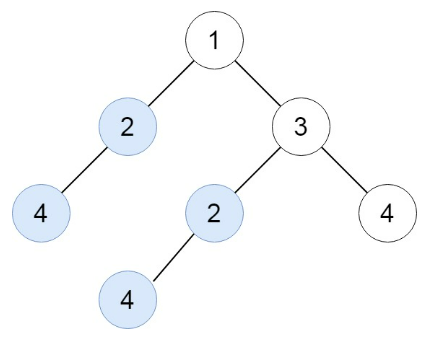
  
* Algorithm
  + This is a tree seralization problem.
    + for each node, calculate its representation consisting of left child, node.val and right child
    + returns the min possible value for leaf nodes (if node.left and node.right are None)
    + for internal nodes, the representation consists of triplet of its child pattern ids and its own node val, as (left, node.val, right)
    + then each triple representation is assigned a unique pattern id stored in node map
    + each pattern's frequency is stored in a count map
      + whenever the count == 2, add the current node to rs list, since the pattern of the current node has been appeared before
    + Notes
      + the advantage of this algorithm is that we don't need to store each node value as strings for complicated tree structures. No matter how complicated a node's child structure is, its pattern is represented by a single integer. This allows us to use O(1) to calculate and store the pattern of each node
* Time complexity
  + O(N) to traverse the tree
* Space complexity
  + O(N) to store the mapping between string representation and node for each node

In [21]:
from typing import List, Optional
# Definition for a binary tree node.

class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right
class Solution:
    def findDuplicateSubtrees(self, root: Optional[TreeNode]) -> List[Optional[TreeNode]]:
        if root is None:
            return []
        
        # store the mapping between the node representation and its id
        # each unique node representation has a unique id
        node_map ={}
        
        # count the frequency of each node_id
        cnt = defaultdict(int)
        
        # store one node for each duplicated node representation
        rs = []
        
        # traverse the tree in post-order sequence. Since child nodes are
        # called before node.val, the ids of child nodes, as well as the node.val
        # are together used to represent the current node. For each unique 
        # representation, a unique id is assigned as its node_id. The frequency of 
        # each node_id is counted, and whenever a node_id has a frequency == 2, we
        # add the current node to result list
        def traverse(node: Optional[TreeNode]) -> int:
            if node is None:
                return -1000
            
            # get the triple representation of the current node
            triple_rep = (traverse(node.left), node.val, traverse(node.right))
            
            # assign a unique pattern_id if the triple_rep is not in the node_map
            if triple_rep not in node_map:
                node_map[triple_rep] = len(node_map)
            
            # retrieve the pattern_id, and increment the count of 
            # the pattern
            node_pattern_id = node_map[triple_rep]           
            cnt[node_pattern_id] += 1
            
            # if the frequency is 2, add the current node to result list
            if cnt[node_pattern_id] == 2:
                # print(f'triple_rep={triple_rep}, node_pattern_id = {node_map[triple_rep]}   node.val={node.val}')
                rs.append(node)
            
            # return the pattern_id to its parent node
            return node_pattern_id    
                
        traverse(root)
        return rs          

#### Leetcode 771. Jewels and Stones
* Overview
  + You're given strings jewels representing the types of stones that are jewels, and stones representing the stones you have. Each character in stones is a type of stone you have. You want to know how many of the stones you have are also jewels.
  + Letters are case sensitive, so "a" is considered a different type of stone from "A".
* Algorithm
  + get the set of jewels so that we can check if a stone is in the jewels set by O(1)
  + traverse the stones and check if each element is in jewels, if so rs += 1
  + return rs
  
* Time complexity
  + O(s + j) where s and j are the lengths of stones and jewels
    + O(s) to traverse stones
    + O(j) to convert jewels list to set
* Space complexity
  + O(j) to maintain the jewels set

In [22]:
class Solution:
    def numJewelsInStones(self, jewels: str, stones: str) -> int:
        if not jewels:
            return 0
        
        # get the set of jewels
        jewels = set(jewels)
        
        rs = 0
        
        # traverse the stones and check if each element is
        # in jewels set, if so, increment rs by 1
        for s in stones:
            if s in jewels:
                rs += 1
        
        return rs        

#### Leetcode 3. Longest Substring Without Repeating Characters
* Overview
  + Given a string s, find the length of the longest substring without repeating characters.
* Algorithm
  + use a hashmap to keep the index of the latest presence of each chars
  + traverse the string
    + if the current char is in the map, this char has appeared in the string, we re-set the start index to be map(ch) + 1 to exclude it from the current sliding window
    + update the map(ch) = i
    + calculate rs = max(rs, i-start+1)
    + return rs
* Time complexity
  + O(N)
  + traverse the string
* Space complexity
  + O(N)
  + maintain the latest index of each unique char in count_map

In [ ]:
class Solution:
    def lengthOfLongestSubstring(self, s: str) -> int:
        if len(s) < 2:
            return len(s)
        
        n = len(s)
        count_map = dict()
        
        start = 0
        rs = 1
        
        # traverse the string and reset start index
        # to exclude the ch if it has been appeared previously
        # then update the index of the current char
        # and calcualte the max length of unique chars
        for i, ch in enumerate(s):
            
            # if ch appears early and is in the hashmap
            # exclude it from the current sliding window            
            if ch in count_map: 
                start = count_map[ch] + 1           
            
            # update the index of the current char
            # and calculate the max length of unique chars
            count_map[ch] = i
            rs = max(rs, i-start+1) 
        
        return rs    
        

#### Leetcode 170. Two Sum III - Data structure design
* Overview
  + Design a data structure that accepts a stream of integers and checks if it has a pair of integers that sum up to a particular value.
  + Implement the TwoSum class:
    + TwoSum() Initializes the TwoSum object, with an empty array initially.
    + void add(int number) Adds number to the data structure.
    + boolean find(int value) Returns true if there exists any pair of numbers whose sum is equal to value, otherwise, it returns false.
* Algorithm
  + keep the numbers and their frequencies in a hashmap when adding new elements
  + when find the value
    + traverse the key, value pairs in the map
    + check if value - key is in the map, if so
      + if the value is odd number, then key and value -key will be different, return True
      + otherwise
        + if key != value // 2 return true
        + if key == value //2 and its frequency > 1, return true
    + after traversal, if no key returns true, return False   

In [1]:
class TwoSum:

    # initialize defaultdict to store the frequency of each visited number
    def __init__(self):
        self.map = defaultdict(int)       

    def add(self, number: int) -> None:
        self.map[number] += 1
        

    def find(self, value: int) -> bool:
        # traverse the keys in self.map, and identify if value -key
        # is in the map. If so, check if target == key and frequency > 1,
        # or target != key. Either will result in a valid answer. Return
        # False if no answer is found during the traversal
        for num in self.map:
            target = value - num
            if target in self.map and (target != num or (target == num and self.map[target] > 1)):
                return True
        return False        
        


# Your TwoSum object will be instantiated and called as such:
# obj = TwoSum()
# obj.add(number)
# param_2 = obj.find(value)

#### Leetcode 454. 4Sum II
* Overview
  + Given four integer arrays nums1, nums2, nums3, and nums4 all of length n, return the number of tuples (i, j, k, l) such that:
    + 0 <= i, j, k, l < n
    + nums1\[i\] + nums2\[j\] + nums3\[k\] + nums4\[l\] == 0
* Algorithm
  + hashmap for 4 lists
    + use a hashmap to store all the combinations of elements from nums1 and nums2
    + traverse all the combinations from nums3 and nums4, and add the frequency of its complement total to the results
    + time complexity O(n^2) using two inner for loops
    + space complexity O(n^2) store totals of two inner loops in hashmap
  + hashmap for general m lists
    + separate the lists in to two parts
    + collect all n//2 element pair totals for part 1 and store frequencies in hashmap1
    + collect all n//2 element pair totals for part 2 and store frequencies in hashmap2
    + traverse keys in hashmap1 and returns the sum of the products of the frequences of keys in hashmap1 and frequencies of its complement keys in hashmap2
    + time complexity
      + O(n^k/2) where k is the total number of lists
      + we separate the total list into two sublists, each has k/2 lists.
      + we traverse k/2 lists in each part, and multiply the frequency of each key in map 1 by the frequency of its complement key in map2, sum them and return 

In [26]:
# simplified version only for 4 lists
class Solution:
    def fourSumCount(self, nums1: List[int], nums2: List[int], nums3: List[int], nums4: List[int]) -> int:
        
        total_map = defaultdict(int) 
        
        # get all combination of sums from nums1 and nums2
        for a in nums1:
            for b in nums2:
                total_map[a+b] += 1
                
        rs = 0
        
        # traverse combinations of nums3 and nums4, and add the
        # frequency of its complement to results
        for c in nums3:
            for d in nums4:
                rs += total_map[-c-d]
                
        return rs   
    
# implementation of the general case where we have more than 4 lists
from collections import Counter
from typing import List, Counter

class Solution:
    def fourSumCount(self, nums1: List[int], nums2: List[int], nums3: List[int], nums4: List[int]) -> int:
        
        def get_pair_total(lists: List[List[int]]) -> Counter:
            
            # initialize res Counter to collect frequencies of totals
            # setting 0:1 so that we can count the frequency of each combination
            # of pairs. In the first iteration, we collect the frequency of each 
            # single element in the first list. In the follwing interations, we
            # collect frequencies of all the possible combinations. In each combination
            # we use one element from each list
            res = Counter({0: 1})
            
            for lst in lists:
                
                # initialize a Counter dict for this iteration
                tmp = Counter()
                
                # traverse the elements in the current list
                for a in lst:
                    # for each total key in res, the current element can
                    # combine to generate equal amount of total+a
                    for total in res:
                        tmp[total+a] += res[total]
                        
                res = tmp
                
            return res
        
        lists = [nums1, nums2, nums3, nums4]
        n = len(lists)
        rs = 0
        
        map1, map2 = get_pair_total(lists[:n//2]), get_pair_total(lists[n//2:])
        
        for key in map1:
            rs += map1[key] * map2[-key]
            
        return rs              
                

#### Leetcode Unique Word Abbreviation
* Overview
  + The abbreviation of a word is a concatenation of its first letter, the number of characters between the first and last letter, and its last letter. If a word has only two characters, then it is an abbreviation of itself.
  + For example:
    + dog --> d1g because there is one letter between the first letter 'd' and the last letter 'g'.
    + internationalization --> i18n because there are 18 letters between the first letter 'i' and the last letter 'n'.
    + it --> it because any word with only two characters is an abbreviation of itself.
  + Implement the ValidWordAbbr class:
    + ValidWordAbbr(String[] dictionary) Initializes the object with a dictionary of words.
    + boolean isUnique(string word) Returns true if either of the following conditions are met (otherwise returns false):
      + There is no word in dictionary whose abbreviation is equal to word's abbreviation.
      + For any word in dictionary whose abbreviation is equal to word's abbreviation, that word and word are the same.
* Algorithm
  + define get_key() function to return the abbreviation of the word
  + add words in dictionary in a hashmap with each the abbreviation and the set of words as key and value
  + for each testing word, get the key and check if the key is in hashmap. If not, return True, or if it is the only word in the corresponding set, return True. Otherwise, return False

In [27]:
class ValidWordAbbr:

    def __init__(self, dictionary: List[str]):
        self.map = defaultdict(set)
        
        for word in dictionary:
            self.map[self.getKey(word)].add(word)        

    def getKey(self, word: str) -> str:
        if len(word) < 3:
            return word
        return word[0] + str(len(word)-2) + word[-1]
    
    def isUnique(self, word: str) -> bool:
        key = self.getKey(word)
        
        if key not in self.map or (len(self.map[key]) == 1 and word in self.map[key]):
            return True
        return False
    
# Your ValidWordAbbr object will be instantiated and called as such:
# obj = ValidWordAbbr(dictionary)
# param_1 = obj.isUnique(word)

#### Leetcode 380. Insert Delete GetRandom O(1)
* Overview
  + Implement the RandomizedSet class:
    + RandomizedSet() Initializes the RandomizedSet object.
    + bool insert(int val) Inserts an item val into the set if not present. Returns true if the item was not present, false otherwise.
    + bool remove(int val) Removes an item val from the set if present. Returns true if the item was present, false otherwise.
    + int getRandom() Returns a random element from the current set of elements (it's guaranteed that at least one element exists when this method is called). Each element must have the same probability of being returned.
  + You must implement the functions of the class such that each function works in average O(1) time complexity.
* Algorithm
  + use a hashmap to manage the element's values and their indices
  + when adding an element
    + check if the element is in map, if so, return False
    + update the index in map using self.size
    + append the element to the list
  + when deleting an element
    + check if the element is in map, if not, return False (no element to delete)
    + get the index of the element from the map, and delete its entry from map
    + if the index < self.size -1 (if the element to be removed is not the last element)
      + exchang the element with the last element in the list
      + update the previous last element exchanged to the index position in map
    + pop the list to remove the last element 
  + getRandom
    + if the list size is 1, return self.list(0)
    + otherwise, get a random index from the existing list, and return its value

In [ ]:
class RandomizedSet:

    def __init__(self):
        self.list = []
        self.map = {} 
        self.size = 0

    def insert(self, val: int) -> bool:
        if val in self.map:
            return False
        
        # insert the index of the new element to dictionary
        self.map[val] = self.size
        
        # append the element to the list and increment list size
        self.list.append(val)
        self.size += 1
        return True

    def remove(self, val: int) -> bool:
        if val not in self.map:
            return False
        
        # retrieve the element index from map
        # and delete its record from the map
        index = self.map[val]
        del self.map[val]
        
        # if the element is not the last element in the list
        # exchange it with the last element, and update
        # the new index of the prervious last elment after exchange 
        if index != self.size - 1:
            self.list[index], self.list[self.size-1] = self.list[self.size-1], self.list[index]
            self.map[self.list[index]] = index    
        
        # pop the last element and decrement the list size
        self.list.pop()
        self.size -= 1
        return True        

    def getRandom(self) -> int:
        # if the list only has one element, return its value
        if self.size == 1:
            return self.list[0]
        
        # get the index of a randam element, and return its value
        index = random.randint(0, self.size-1)
        return self.list[index]
        


# Your RandomizedSet object will be instantiated and called as such:
# obj = RandomizedSet()
# param_1 = obj.insert(val)
# param_2 = obj.remove(val)
# param_3 = obj.getRandom()